# **로지스틱 회귀 (Logistic Regression)**

* 로지스틱 회귀는 분류(Classification) 문제를 해결하기 위해 널리 사용되는 알고리즘 중 하나로, 이름에 '회귀'라는 단어가 포함되어 있지만, 실제로는 이진 분류(Binary Classification) 문제에 주로 사용
* 로지스틱 회귀는 선형 회귀 모델의 출력에 시그모이드(Sigmoid) 함수를 적용하여, 예측 값을 0과 1 사이의 확률로 변환

### 시그모이드 함수와 예측 함수

\begin{equation}
\sigma(x) = \frac{1}{1 + e^{-x}}
\end{equation}

\begin{equation}
\hat{y} = \sigma(w_0 + w_1 x_1 + ... + w_p x_p)
\end{equation}

* $\sigma$는 시그모이드 함수이고, $w_0, w_1, ..., w_p$는 모델의 파라미터에 해당

### 목적 함수

* 로지스틱 회귀의 학습 목표는 아래의 바이너리 크로스 엔트로피 손실(Binary Cross Entropy Loss)을 최소화하는 파라미터 $w$를 찾는 것

\begin{equation}
BinaryCrossEntropy = -\frac{1}{N}\sum_{i=1}^{N}y_i\log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)
\end{equation}

***

## 1. Sample Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import multiprocessing
from sklearn.datasets import make_classification, load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
plt.style.use('seaborn-v0_8-whitegrid')

In [2]:
# Logistic Regression 기본 작동을 확인하기 위한 임의의 데이터 생성

# 샘플 수 정의
samples = 1000

# make_classification을 사용해 샘플 데이터 생성
# n_samples: 생성할 샘플 수
# n_features: 특성(피처)의 수
# n_informative: 유의미한(유용한) 특성 수
# n_redundant: 중복되는 특성 수
# n_clusters_per_class: 클래스 당 클러스터 수
X, y = make_classification(n_samples=samples, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)

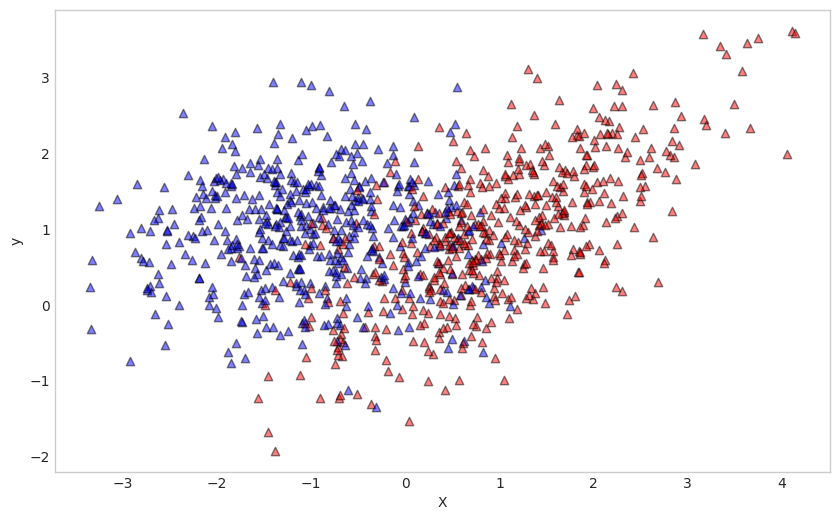

In [3]:
# Logistic Regression을 위한 생성된 데이터 시각화

# 하나의 서브플롯(fig와 ax 객체) 생성, 크기 설정
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# 그리드 추가
ax.grid()

# x축과 y축 레이블 설정
ax.set_xlabel('X')
ax.set_ylabel('y')

# 각 데이터 포인트를 반복하면서 시각화
# y 값이 0일 때 빨간색 삼각형으로, 1일 때 파란색 삼각형으로 표시
for i in range(samples):
    if y[i] == 0:
        ax.scatter(X[i, 0], X[i, 1], edgecolors='k', alpha=0.5, marker='^', color='r')  # 클래스 0 데이터 포인트
    else:
        ax.scatter(X[i, 0], X[i, 1], edgecolors='k', alpha=0.5, marker='^', color='b')  # 클래스 1 데이터 포인트

# 플롯 표시
plt.show()

In [4]:
# 데이터를 훈련 세트와 테스트 세트로 분할

# train_test_split 함수를 사용해 데이터를 분할
# X: 입력 특성 데이터
# y: 타깃 레이블
# test_size=0.2: 테스트 세트의 비율을 20%로 설정
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
# Logistic Regression 모델 학습 및 평가

# Logistic Regression 모델 초기화
model = LogisticRegression()

# 훈련 데이터를 사용하여 모델 학습
model.fit(X_train, y_train)

# 테스트 데이터에 대한 모델 성능 출력
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

평가 데이터 점수: 0.86


In [6]:
# 교차 검증을 통한 Logistic Regression 모델 성능 평가

# cross_val_score 함수를 사용해 10-fold 교차 검증 수행
# model: 평가할 모델
# X: 전체 입력 특성 데이터
# y: 전체 타깃 레이블
# scoring='accuracy': 모델의 정확도를 평가 척도로 사용
# cv=10: 10개의 폴드(folds)를 사용하여 교차 검증 수행
scores = cross_val_score(model, X, y, scoring='accuracy', cv=10)

# 교차 검증 결과의 평균 점수 출력
print('CV 평균 점수: {}'.format(scores.mean()))

CV 평균 점수: 0.857


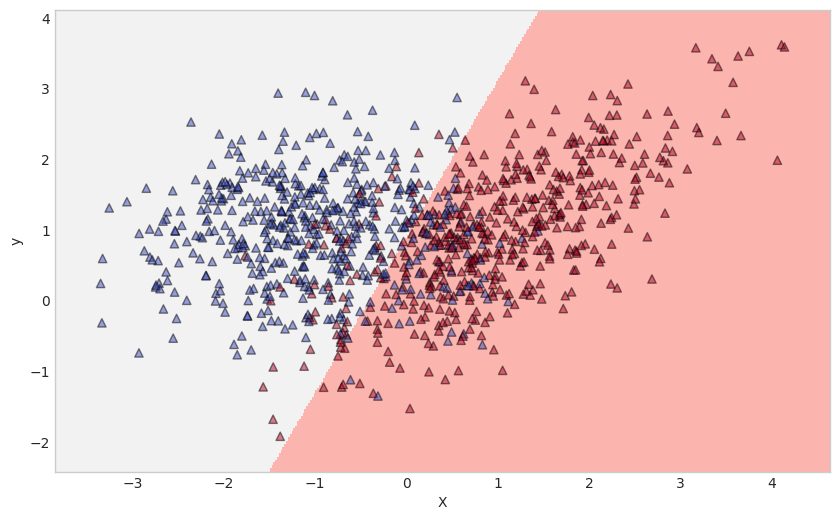

In [7]:
# Logistic Regression 모델의 결정 경계 시각화

# x와 y 특성의 최소/최대 값 설정 (결정 경계 시각화를 위해 여유 공간 0.5 추가)
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

# x와 y 값에 대해 그리드 생성 (결정 경계 그리드를 만들기 위한 좌표)
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# 그리드 좌표로 예측 수행 (각 그리드 점에서의 클래스 예측)
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# 예측 결과를 그리드 모양에 맞게 재구성
Z = Z.reshape(xx.shape)

# 결정 경계 시각화
plt.figure(1, figsize=(10, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)  # 결정 경계를 컬러로 표현

# 실제 데이터 포인트를 산점도로 시각화
plt.scatter(X[:, 0], X[:, 1], c=np.abs(y - 1), edgecolors='k', alpha=0.5, marker='^', cmap=plt.cm.coolwarm)

# x축과 y축 레이블 설정
plt.xlabel('X')
plt.ylabel('y')

# x축과 y축의 범위 설정
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# x축과 y축의 눈금 설정
plt.xticks()
plt.yticks()

# 플롯 표시
plt.show()

## 2. IRIS Data

### 2-1. 데이터 분석

In [8]:
# Iris 데이터셋 로드 및 정보 확인

# sklearn에서 제공하는 Iris 데이터셋 로드
iris = load_iris()

# 데이터셋의 키(특성, 타깃, 설명 등)를 출력
print(iris.keys())

# 데이터셋에 대한 자세한 설명 출력
print(iris.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= =====

In [9]:
# Iris 데이터셋을 데이터프레임으로 변환하고 타깃 레이블 추가

# Iris 데이터의 특성(feature)들을 사용하여 pandas DataFrame 생성
# 컬럼 이름은 데이터셋의 특성 이름으로 설정
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# 타깃 레이블(종(species) 정보)을 pandas Series로 변환하고, 카테고리형으로 설정
species = pd.Series(iris.target, dtype='category')

# 카테고리형 타깃 레이블에 실제 종 이름(versicolor, setosa, virginica)으로 이름 변경
species = species.cat.rename_categories(iris.target_names)

# 데이터프레임에 'Species' 열을 추가하여 타깃 레이블 포함
iris_df['Species'] = species

# Iris 데이터프레임의 기초 통계 정보 확인
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


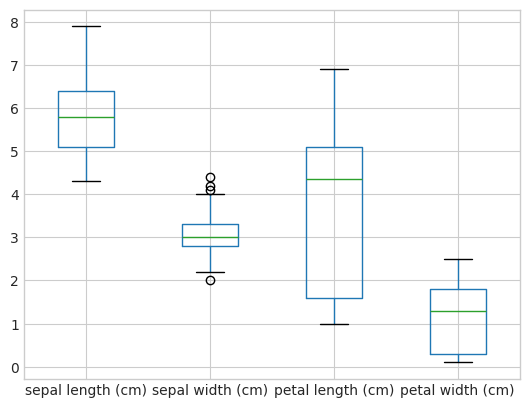

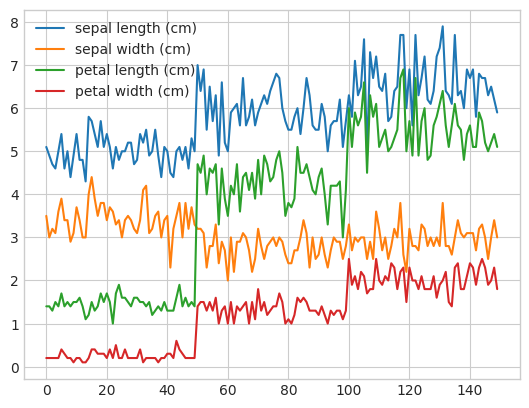

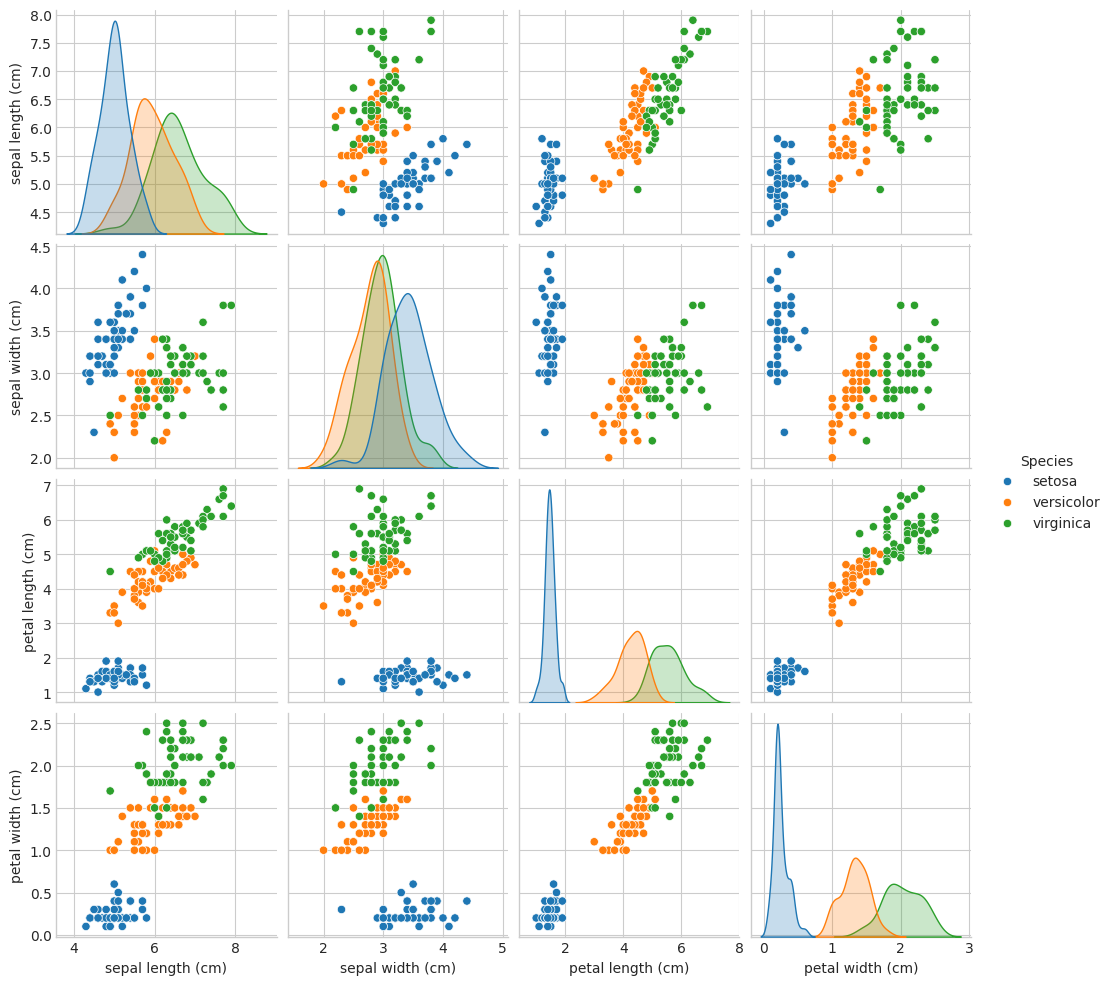

In [10]:
# Iris 데이터프레임의 각 특성에 대한 시각화

iris_df.boxplot();

# Iris 데이터프레임의 기본 플롯 (선 그래프 등) 생성
iris_df.plot();

# Seaborn을 사용해 각 특성 쌍 간의 관계를 시각화하는 페어플롯 생성
# 'Species'에 따라 다른 색상으로 구분
sns.pairplot(iris_df, hue='Species');

### 2-2. IRIS 데이터에 대한 로지스틱 회귀

In [11]:
# Iris 데이터셋을 훈련 세트와 테스트 세트로 분할
# X 변수로 2번째와 3번째 특성 (꽃잎(petal)의 길이와 너비)만 사용하여 분류
# stratify=iris.target: 타깃의 클래스 비율을 훈련 세트와 테스트 세트에 동일하게 유지

X_train, X_test, y_train, y_test = train_test_split(iris.data[:, [2, 3]], iris.target, test_size=0.2, random_state=1, stratify=iris.target)

In [12]:
# Logistic Regression 모델 생성 및 학습

# Logistic Regression 모델 초기화
# solver='lbfgs': 최적화 알고리즘으로 L-BFGS 알고리즘 사용
# multi_class='auto': 다중 클래스 분류를 위한 설정, 자동으로 클래스가 둘 이상일 경우 다중 클래스 분류 적용
# C=100.0: 정규화 강도를 설정하는 하이퍼파라미터 (값이 클수록 규제가 약해짐)
# random_state=1: 결과의 재현성을 위해 난수 시드 설정
model = LogisticRegression(solver='lbfgs', multi_class='auto', C=100.0, random_state=1)

# 훈련 데이터를 사용하여 모델 학습
model.fit(X_train, y_train)

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=100.0, multi_class='auto', random_state=1)

In [13]:
# 학습 데이터에 대한 정확도 점수 출력
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))

# 테스트 데이터에 대한 정확도 점수 출력
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9666666666666667
평가 데이터 점수: 0.9666666666666667


In [14]:
# 훈련 데이터와 테스트 데이터를 결합하여 전체 데이터셋 생성

# 훈련 데이터와 테스트 데이터를 수직 방향으로 결합 (특성)
X = np.vstack((X_train, X_test))

# 훈련 데이터와 테스트 데이터의 레이블을 수평 방향으로 결합 (타깃)
y = np.hstack((y_train, y_test))

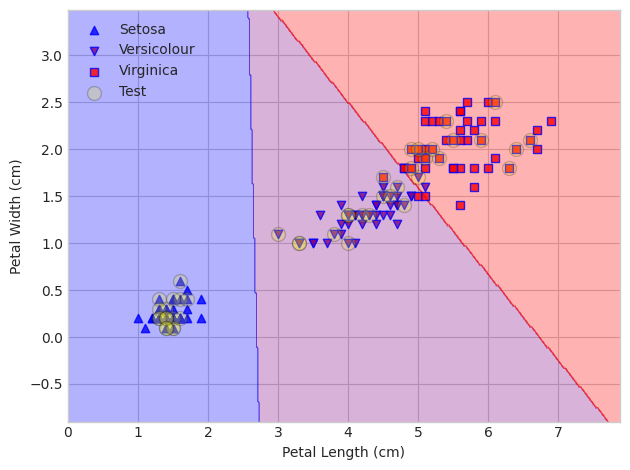

In [15]:
# 로지스틱 회귀 모델의 결정 경계 시각화 및 데이터 포인트 플롯

# 특성의 최소값과 최대값 설정 (여유 공간 추가)
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# 그리드 생성 (결정 경계를 시각화하기 위한 좌표)
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))

# 그리드 좌표에 대해 모델 예측 수행
Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)

# 예측 결과를 그리드 모양에 맞게 재구성
Z = Z.reshape(xx1.shape)

# 각 클래스에 대한 설정
species = ('Setosa', 'Versicolour', 'Virginica')
markers = ('^', 'v', 's')
colors = ('blue', 'purple', 'red')
cmap = ListedColormap(colors[:len(np.unique(y))])

# 결정 경계를 컬러로 표현
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)

# x축과 y축 범위 설정
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

# 각 클래스에 대한 데이터 포인트를 시각화
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], 
                marker=markers[idx], label=species[cl], edgecolors='b')

# 테스트 데이터를 다른 색으로 강조하여 표시
X_comb_test, y_comb_test = X[range(105, 150), :], y[range(105, 150)]
plt.scatter(X_comb_test[:, 0], X_comb_test[:, 1],
            c='yellow', edgecolors='k', alpha=0.2, linewidth=1, marker='o', s=100, label='Test')

# x축과 y축 레이블 설정
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

# 범례 추가
plt.legend(loc='upper left')

# 레이아웃 조정
plt.tight_layout();

In [16]:
# 로지스틱 회귀 모델의 하이퍼파라미터 튜닝을 위한 그리드 검색

# 하이퍼파라미터 그리드 정의
# penalty: 규제 항으로 l2 규제만 사용
# C: 규제 강도를 제어하는 하이퍼파라미터, 여러 값으로 테스트
param_grid = [{'penalty': ['l2'],
               'C': [2.0, 2.2, 2.4, 2.6, 2.8, 3.0],
              'max_iter': [500]}]

# GridSearchCV 객체 초기화
# estimator: 평가할 기본 모델 (Logistic Regression)
# param_grid: 테스트할 하이퍼파라미터의 그리드
# scoring='accuracy': 정확도를 평가 척도로 사용
# cv=10: 10-fold 교차 검증 사용
# n_jobs=multiprocessing.cpu_count(): 가능한 모든 CPU 코어를 사용하여 병렬 처리
gs = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

# GridSearchCV 객체를 출력하여 설정을 확인
gs

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=16,
             param_grid=[{'C': [2.0, 2.2, 2.4, 2.6, 2.8, 3.0],
                          'max_iter': [500], 'penalty': ['l2']}],
             scoring='accuracy')

In [17]:
# 그리드 검색 실행하여 최적의 하이퍼파라미터 찾기
result = gs.fit(iris.data, iris.target)

In [18]:
# 그리드 검색 결과 출력 및 최적의 모델 성능 확인

# 최적의 모델 (하이퍼파라미터 조합) 출력
print(gs.best_estimator_)

# 최적 모델의 교차 검증 평균 정확도 점수 출력
print('최적 점수: {}'.format(gs.best_score_))

# 최적의 하이퍼파라미터 조합 출력
print('최적 파라미터: {}'.format(gs.best_params_))

# 모든 그리드 검색 결과를 DataFrame으로 변환하여 출력
pd.DataFrame(result.cv_results_)

LogisticRegression(C=2.4, max_iter=500)
최적 점수: 0.9800000000000001
최적 파라미터: {'C': 2.4, 'max_iter': 500, 'penalty': 'l2'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_penalty,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016115,0.002837,0.001046,0.000220,2.0,500,l2,"{'C': 2.0, 'max_iter': 500, 'penalty': 'l2'}",1.0,0.933333,...,1.0,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,5
1,0.014922,0.001875,0.001095,0.000314,2.2,500,l2,"{'C': 2.2, 'max_iter': 500, 'penalty': 'l2'}",1.0,0.933333,...,1.0,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,5
2,0.016165,0.003004,0.001174,0.000457,2.4,500,l2,"{'C': 2.4, 'max_iter': 500, 'penalty': 'l2'}",1.0,0.933333,...,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1
3,0.014817,0.001214,0.000881,0.000026,2.6,500,l2,"{'C': 2.6, 'max_iter': 500, 'penalty': 'l2'}",1.0,0.933333,...,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1
4,0.015390,0.001606,0.000872,0.000031,2.8,500,l2,"{'C': 2.8, 'max_iter': 500, 'penalty': 'l2'}",1.0,0.933333,...,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1
5,0.015473,0.002160,0.000836,0.000199,3.0,500,l2,"{'C': 3.0, 'max_iter': 500, 'penalty': 'l2'}",1.0,0.933333,...,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1


### 유방암 데이터

In [19]:
# 유방암 데이터셋 로드 및 정보 확인

# sklearn에서 제공하는 유방암 데이터셋 로드
cancer = load_breast_cancer()

# 데이터셋의 키(특성, 타깃, 설명 등)를 출력
print(cancer.keys())

# 데이터셋에 대한 자세한 설명 출력
print(cancer.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 f

In [20]:
# 유방암 데이터의 특성(feature)들을 사용하여 pandas DataFrame 생성
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

# 데이터프레임에 타깃 레이블(악성/양성)을 추가
cancer_df['Target'] = cancer.target

# 데이터프레임의 처음 다섯 개 행 출력
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [21]:
# 데이터프레임의 기초 통계 정보 출력
cancer_df.describe()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


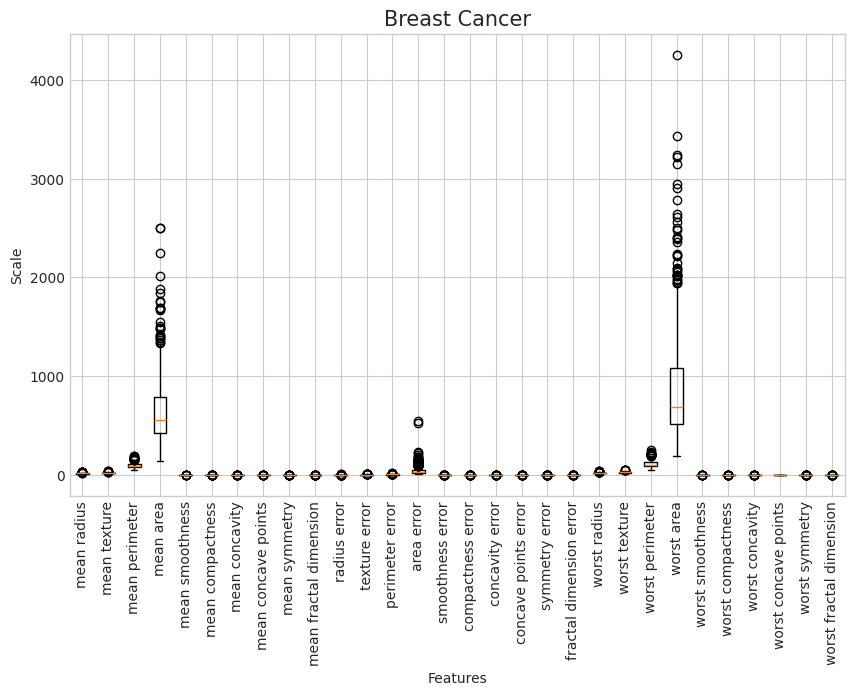

In [22]:
# 박스 플롯을 사용하여 각 특성의 분포 시각화
fg = plt.figure(figsize=[10, 6])
plt.title('Breast Cancer', fontsize=15)
plt.boxplot(cancer.data)

# x축에 각 특성 이름을 레이블로 설정하고 회전
plt.xticks(np.arange(30) + 1, cancer.feature_names, rotation=90)

# x축과 y축 레이블 설정
plt.xlabel('Features')
plt.ylabel('Scale')

# 플롯 표시
plt.show()

### 유방암 데이터에 대한 로지스틱 회귀

In [23]:
# 유방암 데이터셋 로드 및 훈련/테스트 세트로 분할

# 유방암 데이터셋을 특성(X)과 타깃(y)으로 로드
# return_X_y=True: 특성과 타깃을 별도로 반환
X, y = load_breast_cancer(return_X_y=True)

# 데이터를 훈련 세트와 테스트 세트로 분할
# 기본적으로 75% 훈련 세트, 25% 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [24]:
# 로지스틱 회귀 모델 생성 및 유방암 데이터셋에 대한 학습

# Logistic Regression 모델 초기화
# max_iter=3000: 최대 반복 횟수를 3000으로 설정하여 수렴할 때까지 충분한 학습을 보장
model = LogisticRegression(max_iter=3000)

# 훈련 데이터를 사용하여 모델 학습
model.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [25]:
# Logistic Regression 모델의 성능 평가

# 학습 데이터에 대한 정확도 점수 출력
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))

# 테스트 데이터에 대한 정확도 점수 출력
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.960093896713615
평가 데이터 점수: 0.951048951048951


# 확률적 경사 하강법 (Stochastic Gradient Descent, SGD)

* 모델을 학습시키기 위한 효율적이고 간단한 방법
* 전체 데이터 대신 무작위로 선택된 일부 데이터를 사용하여 학습 파라미터를 업데이트
* 손실 함수의 기울기(gradient)를 계산하여, 손실이 최소화되는 방향으로 파라미터를 조정

\begin{equation}
\frac{\partial L}{\partial w} = \underset{h \rightarrow 0}{\lim} \frac{L(w+h) - L(w)}{h} \\
w^{'} = w - \alpha \frac{\partial L}{\partial w}
\end{equation}

- $\frac{\partial L}{\partial w}$: 손실 함수 $L$의 기울기(파라미터 $w$에 대한 미분)
- $\alpha$: 학습률, 기울기를 따라 이동하는 크기를 조절
- $w^{'}$: 업데이트된 파라미터 값

* scikit-learn에서는 선형 회귀를 위한 SGD 회귀와 분류 문제를 위한 SGD 분류를 지원

## SGD를 사용한 선형 회귀 분석

In [26]:
from sklearn.linear_model import SGDRegressor, SGDClassifier
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [27]:
# 보스턴 주택 가격 데이터셋 로드 및 훈련/테스트 세트 분할
data = fetch_california_housing()
# 보스턴 주택 가격 데이터셋의 특성(X)과 타깃(y) 로드
X, y = data.data, data.target

# 훈련 세트와 테스트 세트로 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# 데이터 표준화 및 SGD 회귀 모델을 결합한 파이프라인 생성 및 학습

# make_pipeline: 데이터 전처리와 모델을 결합한 파이프라인 생성
# StandardScaler(): 입력 데이터를 표준화 (평균 0, 표준편차 1)
# SGDRegressor(loss='squared_error'): 손실 함수를 제곱 오차(squared error)로 설정한 SGD 회귀 모델
model = make_pipeline(StandardScaler(), SGDRegressor(loss='squared_error'))

# 훈련 데이터를 사용하여 파이프라인 학습 (데이터 표준화 + 모델 학습)
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [29]:
# 학습된 모델의 성능 평가

# 학습 데이터에 대한 모델의 정확도 점수 출력
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))

# 테스트 데이터에 대한 모델의 정확도 점수 출력
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.6015395171492207
평가 데이터 점수: 0.5400239939581788


### 붓꽃 데이터에 대한 SGD 분류

In [30]:
# Iris 데이터셋 로드 및 훈련/테스트 세트 분할

# Iris 데이터셋의 특성(X)과 타깃(y) 로드
X, y = load_iris(return_X_y=True)

# 훈련 세트와 테스트 세트로 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [31]:
# 데이터 전처리 및 SGD 분류 모델을 위한 파이프라인 생성 및 학습

# make_pipeline을 사용해 파이프라인 생성
# StandardScaler(): 데이터 표준화를 위한 전처리기
# SGDClassifier(loss='log'): 로지스틱 회귀를 사용한 확률적 경사 하강법 분류 모델
model = make_pipeline(StandardScaler(), SGDClassifier(loss='log_loss'))

# 훈련 데이터를 사용하여 파이프라인 학습
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(loss='log_loss'))])

In [32]:
# 학습된 SGD 분류 모델의 성능 평가

# 학습 데이터에 대한 모델의 정확도 점수 출력
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))

# 테스트 데이터에 대한 모델의 정확도 점수 출력
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.8482142857142857
평가 데이터 점수: 0.8947368421052632


### 유방암 데이터에 대한 SGD 분류

In [33]:
# 유방암 데이터셋 로드 및 훈련/테스트 세트 분할

# 유방암 데이터셋의 특성(X)과 타깃(y) 로드
X, y = load_breast_cancer(return_X_y=True)

# 훈련 세트와 테스트 세트로 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [34]:
# 데이터 전처리 및 SGD 분류 모델을 위한 파이프라인 생성 및 학습

# make_pipeline을 사용해 파이프라인 생성
# StandardScaler(): 데이터 표준화를 위한 전처리기
# SGDClassifier(loss='log'): 로지스틱 회귀를 사용한 확률적 경사 하강법 분류 모델
model = make_pipeline(StandardScaler(), SGDClassifier(loss='log_loss'))

# 훈련 데이터를 사용하여 파이프라인 학습
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(loss='log_loss'))])

In [35]:
# 학습된 SGD 분류 모델의 성능 평가

# 학습 데이터에 대한 모델의 정확도 점수 출력
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))

# 테스트 데이터에 대한 모델의 정확도 점수 출력
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.971830985915493
평가 데이터 점수: 0.951048951048951
